# Holiday Spend Project

Overview:
- In this project, `2022/W52: Average holiday Spending by Americans.xlsx` by [@vizwiz](https://data.world/vizwiz) will be loaded into a machine learning pipeline in order to analyse customer spending behavor when on vacation. 

Goal:
- Analyse the accuracy of the `RandomForestRegressor` model by comparing real and predicted target data. 

Steps:
1. Import machine learning packages and source [data.](https://data.world/makeovermonday/2022w52)
2. Explore the data set.
3. Apply pre-processing.
4. Create regression model.
5. Evaluate best model. 
6  Fit data to best model
7. Predict on best model.
8. Measure key metrics and visualise prediction. 

## 1. Importing the Dataset

In [10]:
# Import data ingestion packages
import ssl
import pandas as pd
import numpy as np

# Download and displat dataset
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_excel('https://query.data.world/s/dleaebmqje3gaylsu33w6bgq36sbxr?dws=00000')
df.head()

,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
0,2004,405,71,22,41
1,2005,419,79,21,44
2,2006,428,81,21,42
3,2007,434,83,21,35
4,2008,389,79,22,36


## 2. Explore the Dataset

In [11]:
# Check for non-nulls
print(df.info())

# Check statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 18 non-null     int64
 1   Gifts for Family     18 non-null     int64
 2   Gifts for Friends    18 non-null     int64
 3   Gifts for Coworkers  18 non-null     int64
 4   Other Gifts          18 non-null     int64
dtypes: int64(5)
memory usage: 848.0 bytes
None


,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2012.500000,448.277778,77.222222,24.277778,33.333333
std,5.338539,41.834134,4.413289,4.141690,5.573044
min,2004.000000,387.000000,67.000000,19.000000,25.000000
25%,2008.250000,420.000000,75.000000,21.250000,29.000000
50%,2012.500000,433.000000,79.000000,24.500000,33.000000
75%,2016.750000,484.000000,80.000000,26.000000,36.000000
max,2021.000000,514.000000,84.000000,35.000000,44.000000


## 3. Apply Preprocessing

In [12]:
# Sum total gift amount for each year
df["Total"] = df.sum(axis=1)

# Reduce dimensionality
df = df[["Year", "Total"]]
df.head()

,Year,Total
0,2004,2543
1,2005,2568
2,2006,2578
3,2007,2580
4,2008,2534


## 4. Create Regression Model

In [13]:
# Import machine learning packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Extract feature and target variables from data
X = df.drop(columns="Total")
y = df["Total"]

print(y)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create forest estimator
forest_estimator = RandomForestRegressor()

# Create and configure forest cross validation model
forest_grid_param = {"n_estimators" : [1, 5, 10, 25, 50, 75, 100]}
forest_grid_CV = GridSearchCV(estimator=forest_estimator, param_grid=forest_grid_param, verbose=2)

# Fit the cross_validator model
forest_grid_CV.fit(X_train, y_train)

0     2543
1     2568
2     2578
3     2580
4     2534
5     2517
6     2551
7     2554
8     2562
9     2572
10    2609
11    2620
12    2637
13    2624
14    2656
15    2677
16    2670
17    2669
Name: Total, dtype: int64
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 5, 10, 25, 50, 75, 100]},
             verbose=2)

## 5. Evaluate best model

In [14]:
forest_cv_results = pd.DataFrame(forest_grid_CV.cv_results_).sort_values(by="rank_test_score")
forest_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.032889,0.003310,0.004361,0.001504,25,{'n_estimators': 25},0.686792,0.810145,0.658828,0.745958,0.982791,0.776903,0.115338,1
2,0.018648,0.001034,0.003993,0.000992,10,{'n_estimators': 10},0.744395,0.682524,0.766036,0.647048,0.991917,0.766384,0.120517,2
5,0.086089,0.007059,0.005787,0.001550,75,{'n_estimators': 75},0.766571,0.667033,0.719615,0.705078,0.969145,0.765488,0.106700,3
4,0.060051,0.008240,0.004802,0.000771,50,{'n_estimators': 50},0.677700,0.661312,0.675829,0.800254,0.982653,0.759550,0.122304,4
6,0.117452,0.012689,0.007020,0.001966,100,{'n_estimators': 100},0.716112,0.658308,0.741710,0.693250,0.982121,0.758300,0.115222,5
0,0.006005,0.000990,0.003382,0.001643,1,{'n_estimators': 1},0.708693,0.606679,0.580545,0.655537,0.962812,0.702853,0.137157,6
1,0.011842,0.002301,0.002619,0.000456,5,{'n_estimators': 5},0.747706,0.411448,0.790932,0.088926,0.996307,0.607064,0.319947,7


## 6. Fit data to best model

In [15]:
# Select best estimator
best_forest_estimator = forest_grid_CV.best_estimator_
best_forest_estimator.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

## 7. Predict on best model

In [16]:
# Predict target values
y_pred = best_forest_estimator.predict(X_test)
y_pred

array([2566.36, 2566.36, 2555.2 , 2538.2 , 2566.36, 2638.76])

## 8. Display key metrics and visualisation

In [17]:
# Import key metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Print key metrics
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean absolute error: ", round(mean_absolute_error(y_test, y_pred),2))

# Create table comparison of real and predicted targets
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame({"Total (Predicted)" : y_pred}).set_index(y_test.index)
df_forest = pd.concat([X_test, y_test, y_pred], axis=1).sort_values(by="Year")
df_forest

Mean squared error:  241.33
Mean absolute error:  13.57


,Year,Total,Total (Predicted)
0,2004,2543,2566.36
1,2005,2568,2566.36
3,2007,2580,2566.36
5,2009,2517,2538.20
8,2012,2562,2555.20
13,2017,2624,2638.76


<Axes: title={'center': 'Vacation Spend: Real Total vs Predicted Total'}, xlabel='Year'>

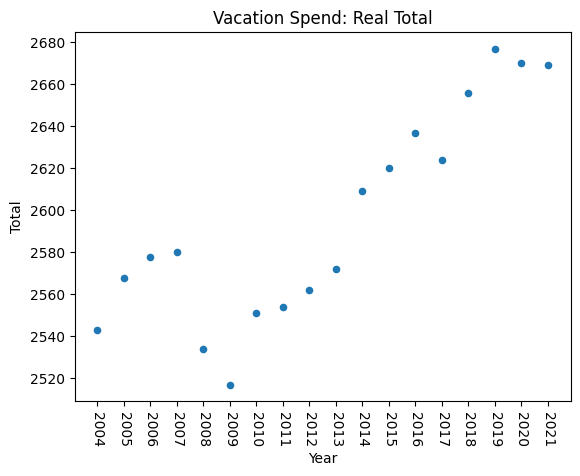

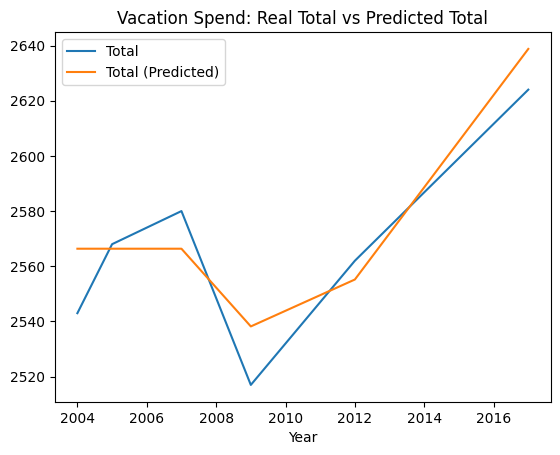

In [18]:
# Visualise source data as scatter plot
df.plot(kind='scatter', x="Year", y='Total', xticks = df["Year"], rot=-90, title="Vacation Spend: Real Total")

# Visualise machine learning model as line plot
df_forest.plot(kind="line", x="Year", y=["Total", "Total (Predicted)"], title="Vacation Spend: Real Total vs Predicted Total")